In [240]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from tqdm import tqdm

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import rasterio
import rioxarray as rio
import xarray as xa

In [5]:
# def check_files_in_list_exist(file_list: Union[List[str], List[Path]]):
#     """State which files don't exist and remove from list"""
#     files_found = []
#     for fl in file_list:
#         # attempt conversion to Path object if necessary
#         if type(fl) != Path:
#             try:
#                 fl = Path(fl)
#             except TypeError:
#                 print(f'{fl} could not be converted to Path object')

#         if fl.is_file():
#             files_found += fl,
#         else:
#             print(f'{fl} not found. Removing from list.')

#     return files_found



# def read_and_merge_pkls(
#     pkl_paths: Union[List[str], List[Path]]
# ) -> pd.DataFrame:
#     """Read in pkl files from list of file paths and merge on index"""
#     # check all files exist
#     pkl_paths_present = check_files_in_list_exist(pkl_paths)
#     df_list = [pd.read_pickle(pkl) for pkl in pkl_paths_present]

#     return reduce(lambda df1,df2: pd.merge(df1,df2,left_index=True,right_index=True), df_list)


def merge_dfs(
    df_list: list[pd.DataFrame]
) -> pd.DataFrame:
    """Merge pd.DataFrames into single pd.DataFrame. HOW."""
    return reduce(lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True), df_list)

In [6]:
baseline_datasets_data_dir = Path('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/RR_contemporary/tabular-data')
df_list = []
for area_file in baseline_datasets_data_dir.rglob("seaviewsurvey_reefcover_*.csv"):
	# read file and save as pkl to correct folder, with standardised formatting (e.g. save 'lng' as 'lon', speci)
	df_list.append(pd.read_csv(area_file))

In [7]:
baseline_datasets_data_dir

PosixPath('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/RR_contemporary/tabular-data')

In [ ]:
(df_list[0].columns)

Index(['surveyid', 'imageid', 'quadratid', 'lat', 'lng', 'AARC', 'ACER',
       'ACOM', 'Acra', 'AFIS', 'AGAR', 'AMAT', 'APAL', 'ApFuCa', 'ATUB', 'CCA',
       'CDEL', 'CNAT', 'CPLI', 'CVAG', 'CVIR', 'CYAN', 'Dict', 'DLAB',
       'DLAB-BL', 'EFAS', 'ENGR1', 'ENSP', 'ERGR', 'ERHD', 'ERSP', 'FISH',
       'Gnep', 'GORG', 'Hali', 'IRCI', 'Lvar', 'MADR', 'MCAV', 'MEA-HC',
       'MEAN', 'Mille', 'Mille-BL', 'MLAG', 'MOB-INV', 'MSE-HC', 'MTUN',
       'Ndig', 'OCOM', 'OCOM-BL', 'OTH-SINV', 'PASTR', 'PLAK', 'PPOR', 'PSEU',
       'PSEU-BL', 'ROSP', 'Sand', 'SCplu', 'Seagrass', 'Sediment', 'SpMass',
       'Sponge', 'SPvase', 'SSID', 'Turf', 'Turfsa', 'Unc', 'UTEN', 'XMUT',
       'ZOAN'],
      dtype='object')

In [ ]:
all_reef_areas.columns

Index(['surveyid', 'imageid', 'quadratid', 'lat', 'lng', 'AARC', 'ACER',
       'ACOM', 'Acra', 'AFIS',
       ...
       'SINV_SPO_F', 'SINV_SPO_V', 'SINV_TUN', 'TFP_RDG_Al', 'TFP_RND_Al',
       'TFP_SMO_Po', 'TSH', 'SGRASS', 'SINV_SPO_C', 'Trans'],
      dtype='object', length=172)

In [ ]:
# # data_path = Path('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/tabular-data/seaviewsurvey_annotations.csv')

# # load in csv files with names seaviewsurvey_reefcover_AREA
# # plot lat/lon points as particular colour for area (potentially conusing cartopy)
# atlantic_data_path = Path(''/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/tabular-data/seaviewsurvey_reefcover_atlantic.csv'')
# atlantic_data = pd.read_csv(atlantic_data_path)
# atlantic_data.head()

In [ ]:
len(all_reef_areas)

1082324

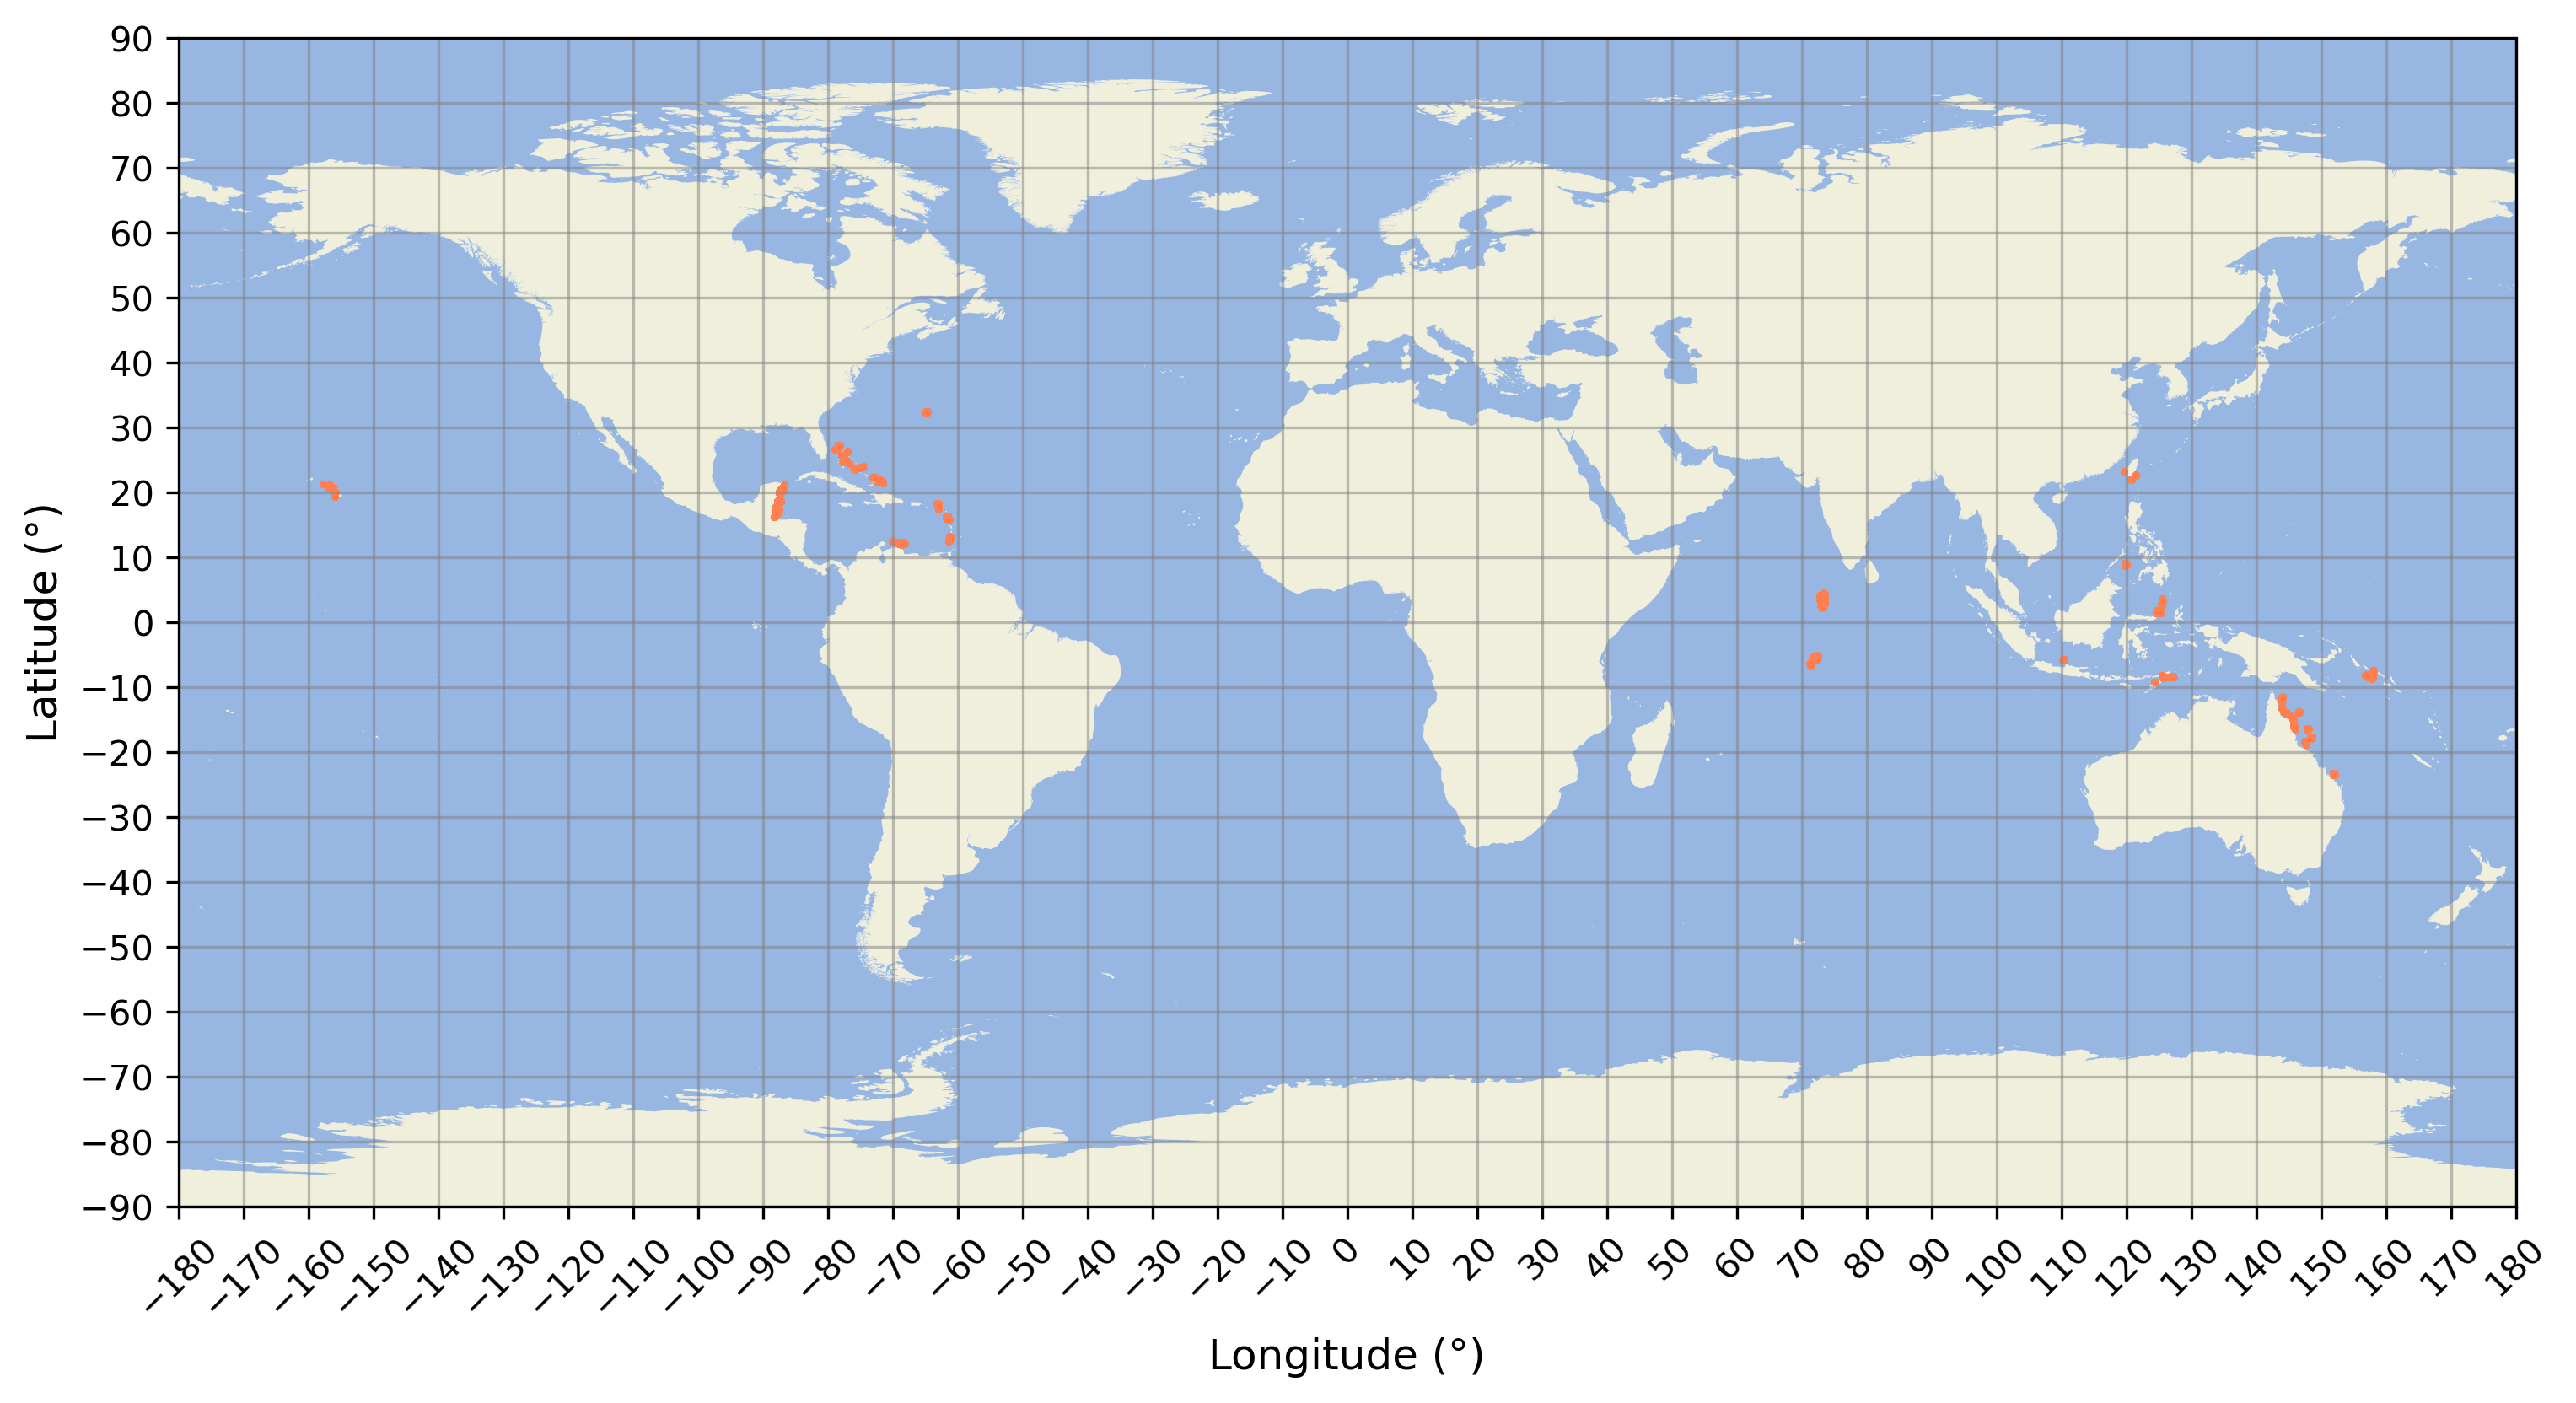

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Add a global map background
# ax.stock_img()

ax.scatter(all_reef_areas.lng, all_reef_areas.lat, s=1, color='coral', transform=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND.with_scale("10m"))
ax.add_feature(cfeature.OCEAN.with_scale("10m"))

xticks = np.arange(-180, 190, 10)
yticks = np.arange(-90, 100, 10)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
# Set x-label and y-label
ax.set_xlabel(r"Longitude (°)", fontsize=12)
ax.set_ylabel(r"Latitude (°)", fontsize=12)
ax.grid(color='grey', which='both', alpha=0.5)

# ax.set_ylim(18, 23)
# ax.set_xlim(-162, -154)
# Hawaii'i
# ax.set_ylim(19, 20.2)
# ax.set_xlim(-156.1, -155.8)
# Caribbean
# Coral triangle
# ax.set_ylim(-30, 10)
# ax.set_xlim(110, 160)
# # North Sulawesi
# ax.set_ylim(0, 10)
# ax.set_xlim(120, 130)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# import folium
# import geopandas as gpd

# # # load data into geopandas dataframe
# # data = gpd.read_file('your_data_file.geojson')

# gpd_all_reef_areas = gpd.GeoDataFrame(all_reef_areas, 
# 	geometry=gpd.points_from_xy(all_reef_areas.lng, all_reef_areas.lat))

# # convert the geometry column to EPSG 4326 (WGS84)
# # data = gpd_all_reef_areas.to_crs(epsg=4326)

# # create a folium map object
# m = folium.Map(location=[gpd_all_reef_areas.centroid.y.mean(), gpd_all_reef_areas.centroid.x.mean()], zoom_start=10)

# # create a folium GeoJson object from the geopandas dataframe
# geojson = folium.GeoJson(gpd_all_reef_areas.__geo_interface__)

# # add the GeoJson object to the map
# geojson.add_to(m)

# # save the map
# # m.save('your_map.html')


# Allen Coral Atlas Dataset
For the Great Barrier Reef and Torres Strait. Excellent visualisation [here](https://allencoralatlas.org/atlas/#4.55/-16.5163/147.1100).

In [9]:
import geopandas as gpd

def load_gpkg(filepath):
    """
    Load a large gpkg file into a memory-efficient geopandas.GeoDataFrame object.

    Args:
        filepath (str): The filepath of the gpkg file.

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame object containing the data from the gpkg file.
    """
    gdf = gpd.read_file(filepath, driver='GPKG')
    return gdf


In [12]:
df_reef_extent = load_gpkg("/Volumes/MRes Drive/reef_baseline/Allen_atlas/Great-Barrier-Reef-and-Torres-Strait-20230310013521/Reef-Extent/reefextent.gpkg")
df_reef_extent.head()

In [18]:
# N.B. took nearly 10 minutes to read whole area
df_benthic = load_gpkg("/Volumes/MRes Drive/reef_baseline/Allen_atlas/Great-Barrier-Reef-and-Torres-Strait-20230310013521/Benthic-Map/benthic.gpkg")
df_benthic.head()

,class,geometry
0,Rock,"POLYGON ((146.84549 -18.00053, 146.84553 -18.0..."
1,Rock,"POLYGON ((146.84576 -18.00116, 146.84589 -18.0..."
2,Coral/Algae,"POLYGON ((146.84338 -18.00098, 146.84347 -18.0..."
3,Coral/Algae,"POLYGON ((146.87401 -18.01863, 146.87414 -18.0..."
4,Coral/Algae,"POLYGON ((146.87302 -18.01940, 146.87311 -18.0..."


In [19]:
df_reef_extent.head()

,class,geometry
0,Reef,"POLYGON ((146.86833 -18.02176, 146.87060 -18.0..."
1,Reef,"POLYGON ((146.87554 -18.01891, 146.87599 -18.0..."
2,Reef,"POLYGON ((146.37751 -17.74124, 146.37770 -17.7..."
3,Reef,"POLYGON ((146.46510 -17.25820, 146.46469 -17.2..."
4,Reef,"POLYGON ((146.48322 -17.25149, 146.48288 -17.2..."


In [98]:
df_benthic["class"].value_counts()

Coral/Algae        877787
Rock               766391
Rubble             568041
Sand               518805
Microalgal Mats     27569
Seagrass            22368
Name: class, dtype: int64

In [99]:
cipher = {"Reef": 1, "Coral/Algae": 2, "Rock": 3, "Rubble": 4, "Sand": 5, "Microalgal Mats": 6, "Seagrass": 7}

df_benthic['class_val'] = df_benthic['class'].map(cipher)
df_reef_extent['class_val'] = df_reef_extent['class'].map(cipher)
df_reef_extent.head()

,class,geometry,class_val
0,Reef,"POLYGON ((146.86833 -18.02176, 146.87060 -18.0...",1
1,Reef,"POLYGON ((146.87554 -18.01891, 146.87599 -18.0...",1
2,Reef,"POLYGON ((146.37751 -17.74124, 146.37770 -17.7...",1
3,Reef,"POLYGON ((146.46510 -17.25820, 146.46469 -17.2...",1
4,Reef,"POLYGON ((146.48322 -17.25149, 146.48288 -17.2...",1


Exception ignored in: <generator object Cycler.__iter__ at 0x14d469210>
Traceback (most recent call last):
  File "/Users/orlandotimmerman/opt/miniconda3/envs/coralshift/lib/python3.11/site-packages/cycler.py", line 239, in __iter__
    def __iter__(self):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1457, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 1758, in _pydevd_bundle.pydevd_cython.ThreadTracer.__call__
  File "/Users/orlandotimmerman/opt/miniconda3/envs/coralshift/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_is_thread_alive.py", line 9, in is_thread_alive
    def is_thread_alive(t):

KeyboardInterrupt: 


<Axes: >

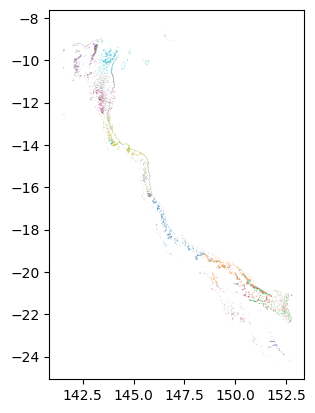

In [166]:
fig, ax = plt.subplots()
df_reef_extent.plot(ax=ax, column="geometry", label="class")

In [134]:
from rasterio import features

def rasterize_shapely_df(
    df: pd.DataFrame, class_col: str, shapes_col: str="geometry", resolution: float=1, all_touched: bool=True
    ) -> np.ndarray:
    """TODO: docstring"""

    # create empty raster grid
    xmin, ymin, xmax, ymax = df.total_bounds    # takes ages with large dfs
    width = int(np.ceil((xmax - xmin) / resolution))
    height = int(np.ceil((ymax - ymin) / resolution))
    # affine transform (handles projection)
    transform = rasterio.Affine(resolution, 0, xmin, 0, -resolution, ymax)
    raster = np.zeros((height, width))

    for _, row in tqdm(df.iterrows(), total=len(df)):
        class_value = row[class_col]
        shapes = [(row[shapes_col], 1)] # the second value (1) represents the value to assign to the raster cell
        rasterized = features.rasterize(
            shapes=shapes, out_shape=(height, width), transform=transform, fill=0, all_touched=True, 
            merge_alg=rasterio.enums.MergeAlg.replace)
        raster[rasterized == 1] = class_value

    return raster, (xmin, ymin, xmax, ymax)


In [178]:
raster_reef_extent, (xmin, ymin, xmax, ymax) = rasterize_shapely_df(df_reef_extent[:], "class_val", resolution=0.01)

100%|██████████| 27381/27381 [01:24<00:00, 325.70it/s]


In [226]:
toy_reef_extent, (xmin, ymin, xmax, ymax) = rasterize_shapely_df(df_reef_extent[:], "class_val", resolution=2)

100%|██████████| 27381/27381 [00:31<00:00, 866.48it/s] 


In [232]:
np.shape(toy_reef_extent)

(8, 6)

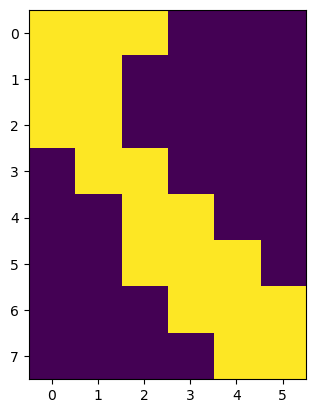

In [227]:
plt.imshow(toy_reef_extent)

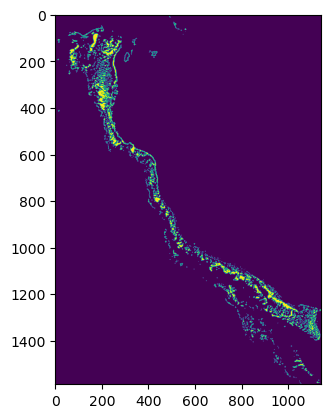

In [179]:
np.shape(raster_reef_extent)
plt.imshow(raster_reef_extent)

In [225]:
def generate_lat_lon_arrays(lats: tuple[float], lons: tuple[float], resolution) -> tuple[np.ndarray]:
    """Provide latitude and longitudes as (bottom_lat, top_lat) and (left_lon, right_lon) respectively. Will want to 
    plot as if viewed on flat globe"""
    # xarray requires first coordinate in vertical direction to be the topmost
    if lats[0] < lats[1]:
        lats_list = np.arange(lats[1], lats[0], -resolution)
    else:
        lats_list = np.arange(lats[0], lats[1], resolution)

    lons_list = np.arange(lons[0], lons[1], resolution)

    return lats_list, lons_list


def xa_array_from_raster(raster: np.ndarray, lat_bounds: tuple[float], lon_bounds: tuple[float], resolution: float=0.01, 
    crs_tag: str="epsg:4326") -> xa.DataArray:

    lats, lons = generate_lat_lon_arrays((lat_bounds[0], lat_bounds[1]), (lon_bounds[0], lon_bounds[1]), resolution)
    coords_dict = {"latitude": lats, "longitude": lons}

    array = xa.DataArray(raster, coords_dict, name="limited reef extent")
    array.rio.write_crs(crs_tag, inplace=True)

    return array



In [237]:
array.transform

AttributeError: 'DataArray' object has no attribute 'transform'

In [246]:
from coralshift.utils import directories, file_ops
from coralshift.dataloading import bathymetry
from coralshift.processing import data
# 30m GBR bathymetry (can visualise ETOPO later if necessary)
gbr_30_dir = Path(directories.get_volume_dir("MRes Drive"), "bathymetry/GBR_30m")

# download missing data
bathymetry.download_30m_gbr_bathymetry(download_dest_dir=gbr_30_dir)

# fetch data
gbr_30_files = file_ops.return_list_filepaths(gbr_30_dir, ".tif")
# generate dictionary of file names and arrays: {filename: xarray.DataArray, ...}
gbr_30_dict_preprocess = data.tifs_to_xa_array_dict(gbr_30_files)
# process xa_arrays
gbr_30_dict = data.process_xa_arrays_in_dict(gbr_30_dict_preprocess, coords_to_drop=["band"])

reduced_array = data.reduce_xa_array(gbr_30_dict[list(gbr_30_dict.keys())[0]])

Already exists: /Volumes/MRes Drive/bathymetry/GBR_30m/Great_Barrier_Reef_A_2020_30m_MSL_cog.tif
Already exists: /Volumes/MRes Drive/bathymetry/GBR_30m/Great_Barrier_Reef_B_2020_30m_MSL_cog.tif
Already exists: /Volumes/MRes Drive/bathymetry/GBR_30m/Great_Barrier_Reef_C_2020_30m_MSL_cog.tif
Already exists: /Volumes/MRes Drive/bathymetry/GBR_30m/Great_Barrier_Reef_D_2020_30m_MSL_cog.tif


In [259]:
coords_cipher = {"x": "longitude", "y": "latitude"}

In [261]:
reduced_array = reduced_array.rename(coords_cipher)
reduced_array

<xarray.DataArray (band: 1, latitude: 600, longitude: 600)>
array([[[  232.56952 ,    84.13783 ,    73.241066, ..., -1742.691   ,
         -1760.5577  , -1788.9287  ],
        [  145.29718 ,   304.33115 ,    69.6088  , ..., -1742.3965  ,
         -1760.4596  , -1769.5894  ],
        [   82.07628 ,    77.95318 ,   129.59013 , ..., -1760.8523  ,
         -1756.3365  , -1777.7374  ],
        ...,
        [  217.3533  ,   217.84415 ,   220.10204 , ..., -4458.0483  ,
         -4513.416   , -4516.6553  ],
        [  217.94232 ,   217.0588  ,   221.86908 , ..., -4146.6562  ,
         -4295.5786  , -4309.3223  ],
        [  216.86246 ,   220.5929  ,   220.00388 , ..., -3981.9282  ,
         -4063.3105  , -4033.2708  ]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 150.0 150.0 150.0 ... 156.0 156.0 156.0
  * latitude     (latitude) float64 -23.0 -23.01 -23.02 ... -28.97 -28.98 -28.99
    spatial_ref  int64 0
Dimensions without coordinates: band
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -9999.0

In [266]:
interped = array.interp_like(reduced_array).rename("interped")
interped

<xarray.DataArray 'interped' (latitude: 600, longitude: 600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    spatial_ref  int64 0
  * latitude     (latitude) float64 -23.0 -23.01 -23.02 ... -28.97 -28.98 -28.99
  * longitude    (longitude) float64 150.0 150.0 150.0 ... 156.0 156.0 156.0

In [270]:
sum(sum(~np.isnan(interped.values)))

0

In [251]:
array

<xarray.DataArray 'limited reef extent' (latitude: 8, longitude: 6)>
array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.]])
Coordinates:
  * latitude     (latitude) float64 -8.408 -10.41 -12.41 ... -20.41 -22.41
  * longitude    (longitude) float64 141.4 143.4 145.4 147.4 149.4 151.4
    spatial_ref  int64 0

In [263]:
dset = xa.merge([array, interped])

In [264]:
dset

<xarray.Dataset>
Dimensions:              (latitude: 8, longitude: 6, band: 1)
Coordinates:
  * latitude             (latitude) float64 -8.408 -10.41 ... -20.41 -22.41
  * longitude            (longitude) float64 141.4 143.4 145.4 147.4 149.4 151.4
    spatial_ref          int64 0
Dimensions without coordinates: band
Data variables:
    limited reef extent  (latitude, longitude) float64 1.0 1.0 1.0 ... 1.0 1.0
    interped             (band, latitude, longitude) float64 nan nan ... nan nan

In [245]:
list(gbr_30_dict.keys())[0]

'Great_Barrier_Reef_D_2020_30m_MSL_cog.tif'

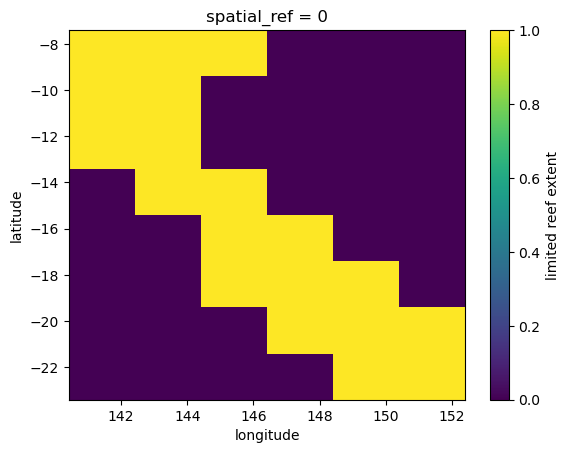

In [236]:
array = xa_array_from_raster(toy_reef_extent, (ymin, ymax), (xmin, xmax), resolution=2)
array.plot()

# I could just shave off the outsides to the nearest whole number and regrid. Going to start by trying rasterio reprojection

In [106]:
raster_benthic = rasterize_shapely_df(df_benthic[df_benthic["class_val"] == 2], "class_val", resolution=1)

100%|██████████| 877787/877787 [23:37<00:00, 619.29it/s]  


In [107]:
# np.shape(raster)
sum(sum(raster_benthic))

3092.0

In [77]:
# generate xa_array of raster


1707.0

In [75]:
sum(sum(raster >= 2))

0

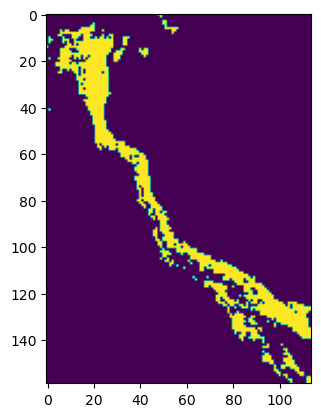

In [108]:
plt.imshow(raster)

In [ ]:
cipher = {"Reef": 1}

In [10]:
import gdal

ModuleNotFoundError: No module named 'gdal'

In [ ]:
# extent = load_gpkg("/Users/orlandotimmerman/Downloads/Great-Barrier-Reef-and-Torres-Strait-20230310013521/Reef-Extent/reefextent.gpkg")
benthic = load_gpkg("/Users/orlandotimmerman/Downloads/Great-Barrier-Reef-and-Torres-Strait-20230310013521/Benthic-Map/benthic.gpkg")

In [ ]:
benthic.to_file("/Users/orlandotimmerman/Downloads/Great-Barrier-Reef-and-Torres-Strait-20230310013521/Benthic-Map/benthic.shp")

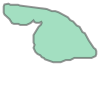

In [ ]:
extent.geometry.iloc[0]

In [ ]:
from matplotlib.collections import PolyCollection
import matplotlib
from shapely import geometry
import shapely.ops as so

In [ ]:
poly_collection = geometry.MultiPolygon(list(extent.geometry))

In [ ]:
new_shape = so.unary_union(poly_collection)


In [ ]:
new_shape

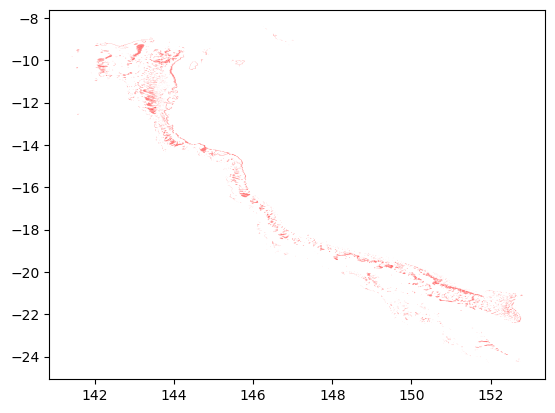

In [ ]:
fig, axs = plt.subplots()

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

TypeError: object of type 'Polygon' has no len()

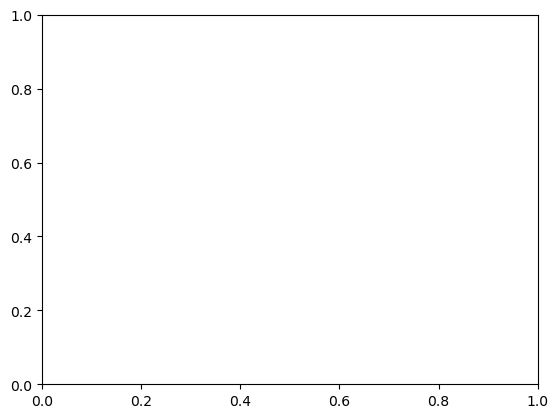

In [ ]:
fig, ax = plt.subplots()
coll = PolyCollection(extent.geometry, cmap=matplotlib.cm.jet)

In [ ]:
# # save the map
# m.save('your_map.html')

In [ ]:
# import folium
# import geopandas as gpd


# gpd_all_reef_areas = gpd.GeoDataFrame(all_reef_areas, 
# 	geometry=gpd.points_from_xy(all_reef_areas.lng, all_reef_areas.lat))


# test_map = folium.Map(location=[gpd_all_reef_areas.centroid.y.mean(), gpd_all_reef_areas.centroid.x.mean()], zoom_start=1)
# # create a folium GeoJson object from the geopandas dataframe
# geojson_lim = folium.GeoJson(gpd_all_reef_areas[:1000].__geo_interface__)
# geojson_lim.add_to(test_map)
# display(test_map)
